In [1]:
import biotite.structure as struc
import biotite.structure.io as strucio
from biotite.structure.io.pdb import PDBFile
import numpy as np
from collections import defaultdict

atom_array = strucio.load_structure(file_path='3U8K.pdb', model=1, altloc='first')
one_complex = atom_array[np.isin(atom_array.chain_id, ['A', 'B', 'C', 'D', 'E'])]
one_complex_protein_only = one_complex[struc.filter_amino_acids(one_complex)]
print(len(one_complex_protein_only))


8122


In [2]:
"""
This script iterates over adjacent chain pairs (A-B, B-C, C-D, D-E, E-A), computes all inter-chain atom-atom distances, 
and identifies interface residues by selecting residue pairs with any heavy-atom contacts closer than 4 Å.
For each chain pair, it aggregates these contacts at the residue level and prints a residue-to-residue interaction map, 
which can be compared across pairs to assess whether the interfaces are identical and thus whether the complex is perfectly symmetric.
"""

chain_list_1 = ['A', 'B', 'C', 'D', 'E']
chain_list_2 = ['B', 'C', 'D', 'E', 'A']

chain_combine = list(zip(chain_list_1, chain_list_2))
print(chain_combine)

dist_pair_together = []
for combi in chain_combine:
    chain_1, chain_2 = combi
    two_chains = one_complex_protein_only[np.isin(one_complex_protein_only.chain_id, [chain_1, chain_2])]
    print(f"Shape of {chain_1} and {chain_2}: {two_chains.shape}")
    
    # check if there is any hydrogens
    # if the shape of only heavy atom is the same with before, that means no hydrogen
    two_chains_heavy = two_chains[np.isin(two_chains.element, ['C', 'N', 'O', 'S'])]
    print(f"Shape of {chain_1} and {chain_2}: {two_chains_heavy.shape}")
    
    # build distance matrix between two adjacent chains
    chain_1 = one_complex_protein_only[one_complex_protein_only.chain_id == chain_1]
    chain_2 = one_complex_protein_only[one_complex_protein_only.chain_id == chain_2]
    chain_1_coord = chain_1.coord
    chain_2_coord = chain_2.coord
    diff = chain_1_coord[None,:,:] - chain_2_coord[:,None,:]
    dist = np.linalg.norm(diff, axis=-1)
    I, J = np.where(dist < 4) # I, J are array index
    
    # Extract the resn and resi
    # print(f"chain_1.res_id: {chain_1.res_id}")
    chain_1_resid_list = [(chain_1.res_id[j], chain_1.res_name[j]) for j in J]
    chain_2_resid_list = [(chain_2.res_id[i], chain_2.res_name[i]) for i in I]
    interaction_pair = set(list(zip(chain_1_resid_list, chain_2_resid_list)))
    print(f"interaction_pair: {interaction_pair}")
    
    # collectly build up interaction
    grouped = defaultdict(set)
    for res1, res2 in interaction_pair:
        grouped[res1].add(res2)
        
    for res1, partners in sorted(grouped.items()):
        partners_str = ", ".join(
            f"{res2[1]}{res2[0]}" for res2 in sorted(partners)
        )
        print(f"{res1[1]}{res1[0]} -> {partners_str}")
    

[('A', 'B'), ('B', 'C'), ('C', 'D'), ('D', 'E'), ('E', 'A')]
Shape of A and B: (3268,)
Shape of A and B: (3268,)
interaction_pair: {((np.int64(144), np.str_('THR')), (np.int64(75), np.str_('SER'))), ((np.int64(149), np.str_('GLU')), (np.int64(104), np.str_('ARG'))), ((np.int64(44), np.str_('ILE')), (np.int64(170), np.str_('ARG'))), ((np.int64(187), np.str_('CYS')), (np.int64(164), np.str_('TYR'))), ((np.int64(46), np.str_('ASN')), (np.int64(168), np.str_('TYR'))), ((np.int64(24), np.str_('ASP')), (np.int64(3), np.str_('ARG'))), ((np.int64(17), np.str_('ASP')), (np.int64(7), np.str_('LEU'))), ((np.int64(19), np.str_('ILE')), (np.int64(3), np.str_('ARG'))), ((np.int64(15), np.str_('ARG')), (np.int64(8), np.str_('TYR'))), ((np.int64(91), np.str_('ALA')), (np.int64(98), np.str_('LEU'))), ((np.int64(123), np.str_('CYS')), (np.int64(168), np.str_('TYR'))), ((np.int64(144), np.str_('THR')), (np.int64(102), np.str_('LEU'))), ((np.int64(137), np.str_('ARG')), (np.int64(168), np.str_('TYR'))), (

In [3]:
"""This script iterates over adjacent chain pairs in a cyclic complex (A-B, B-C, C-D, D-E, E-A), 
computes all inter-chain atom-atom distances, and identifies interface atom pairs within 4A.
It then maps these contacts to residue and atom identities and classifies each interaction into 
backbone-backbone, backbone-side-chain, or side-chain-side-chain categories, 
enabling comparison of interface composition across chain pairs. 
"""

chain_list_1 = ['A', 'B', 'C', 'D', 'E']
chain_list_2 = ['B', 'C', 'D', 'E', 'A']

chain_combine = list(zip(chain_list_1, chain_list_2))
print(chain_combine)

dist_pair_together = []
for combi in chain_combine:
    chain_1, chain_2 = combi
    two_chains = one_complex_protein_only[np.isin(one_complex_protein_only.chain_id, [chain_1, chain_2])]
    print(f"Shape of {chain_1} and {chain_2}: {two_chains.shape}")
    
    # check if there is any hydrogens
    # if the shape of only heavy atom is the same with before, that means no hydrogen
    two_chains_heavy = two_chains[np.isin(two_chains.element, ['C', 'N', 'O', 'S'])]
    print(f"Shape of {chain_1} and {chain_2}: {two_chains_heavy.shape}")
    
    # build distance matrix between two adjacent chains
    chain_1 = one_complex_protein_only[one_complex_protein_only.chain_id == chain_1]
    chain_2 = one_complex_protein_only[one_complex_protein_only.chain_id == chain_2]
    chain_1_coord = chain_1.coord
    chain_2_coord = chain_2.coord
    diff = chain_1_coord[None,:,:] - chain_2_coord[:,None,:]
    dist = np.linalg.norm(diff, axis=-1)
    I, J = np.where(dist < 4) # I, J are array index
    
    # Extract the resn and resi
    # print(f"chain_1.res_id: {chain_1.res_id}")
    chain_1_resid_list = [(chain_1.res_id[j], chain_1.res_name[j], chain_1.atom_name[j]) for j in J]
    chain_2_resid_list = [(chain_2.res_id[i], chain_2.res_name[i], chain_2.atom_name[i]) for i in I]
    interaction_pair = set(list(zip(chain_1_resid_list, chain_2_resid_list)))
    # print(f"interaction_pair: {interaction_pair}")
    
    # if the both atom in a pair is from N, O, C or CA then it is between backbone to backbone
    bb_interaction_pair = []
    bb_sc_interaction_pair = []
    sc_sc_interaction_pair = []
    for pair in interaction_pair:
        chain_1_atom, chain_2_atom = pair
        if np.isin(chain_1_atom[2], ['N', 'O', 'C', 'CA']) and np.isin(chain_2_atom[2], ['N', 'O', 'C', 'CA']):
            bb_interaction_pair.append(pair)
        elif np.isin(chain_2_atom[2], ['N', 'O', 'C', 'CA']) or np.isin(chain_1_atom[2], ['N', 'O', 'C', 'CA']):
            bb_sc_interaction_pair.append(pair)
        elif not np.isin(chain_2_atom[2], ['N', 'O', 'C', 'CA']) and not np.isin(chain_1_atom[2], ['N', 'O', 'C', 'CA']):
            sc_sc_interaction_pair.append(pair)
            
    # print(f"bb_interaction_pair: {bb_interaction_pair}")
    # print(f"bb_sc_interaction_pair: {bb_sc_interaction_pair}")
    # print(f"sc_sc_interaction_pair: {sc_sc_interaction_pair}")
    
    counts = {
    "BB-BB": len(bb_interaction_pair),
    "BB-SC": len(bb_sc_interaction_pair),
    "SC-SC": len(sc_sc_interaction_pair),
    }
    
    print(f"counts: {counts}")


[('A', 'B'), ('B', 'C'), ('C', 'D'), ('D', 'E'), ('E', 'A')]
Shape of A and B: (3268,)
Shape of A and B: (3268,)
counts: {'BB-BB': 0, 'BB-SC': 52, 'SC-SC': 85}
Shape of B and C: (3220,)
Shape of B and C: (3220,)
counts: {'BB-BB': 0, 'BB-SC': 57, 'SC-SC': 82}
Shape of C and D: (3246,)
Shape of C and D: (3246,)
counts: {'BB-BB': 0, 'BB-SC': 44, 'SC-SC': 79}
Shape of D and E: (3232,)
Shape of D and E: (3232,)
counts: {'BB-BB': 1, 'BB-SC': 57, 'SC-SC': 88}
Shape of E and A: (3278,)
Shape of E and A: (3278,)
counts: {'BB-BB': 1, 'BB-SC': 55, 'SC-SC': 97}


In [4]:
"""
We could also iterate through the chain pair,
calculate the inter-chain atom-atom distance,
classify atom-atom contact into BB-BB, BB-SC, SC-SC,
store the result into b-factor
"""

import numpy as np
import biotite.structure as structure


atom_array = one_complex_protein_only
n_atom = len(atom_array)

b_factor = np.zeros(n_atom, dtype=float)

chain_list_1 = ['A', 'B', 'C', 'D', 'E']
chain_list_2 = ['B', 'C', 'D', 'E', 'A']

chain_combi = list(zip(chain_list_1, chain_list_2))

global_interaction_pair = set()
for combi in chain_combi:
    mask_chain1 = atom_array.chain_id == combi[0]
    mask_chain2 = atom_array.chain_id == combi[1]
    chain1 = atom_array[mask_chain1]
    chain2 = atom_array[mask_chain2]
    # return the location of array where True
    # used as a way to reflect the global index loccation
    print(np.where(mask_chain1)) 
    global_mask_chain1 = np.where(mask_chain1)[0] # 100, 101, 102,...
    global_mask_chain2 = np.where(mask_chain2)[0] # 300, 301, 302, ...
    
    # calculate the distance matrix
    diff = chain1.coord[None,:,:] - chain2.coord[:,None,:]
    dist = np.linalg.norm(diff, axis=-1)
    I, J = np.where(dist < 4) # 1, 2, 3, ...
    global_I = [global_mask_chain2[i] for i in I] # 100, 101, 102,...
    global_J = [global_mask_chain1[j] for j in J]
    for pair in list(zip(global_I, global_J)):
        global_interaction_pair.add(pair)
    
print(global_interaction_pair)
    
def check_backbone(atom_name):
    return atom_name in {'N', 'CA', 'C', 'O', 'OXT'}
    
bb_interaction = []
bb_sc_interaction = []
sc_sc_interaction = []

for pair in global_interaction_pair:
    pair_0 = check_backbone(atom_array[pair[0]].atom_name)
    pair_1 = check_backbone(atom_array[pair[1]].atom_name)
    
    if pair_0 == True and pair_1 == True:
        bb_interaction.append(pair)
        b_factor[pair[0]] = 0
        b_factor[pair[1]] = 0
    elif pair_0 == False and pair_1 == False:
        sc_sc_interaction.append(pair)
        b_factor[pair[0]] = 10
        b_factor[pair[1]] = 10
    else:
        bb_sc_interaction.append(pair)
        
print(bb_interaction)

atom_array.set_annotation("b_factor", b_factor)

pdb = PDBFile()
pdb.set_structure(atom_array)
pdb.write("interface_colored.pdb")

    


(array([   0,    1,    2, ..., 1667, 1668, 1669], shape=(1670,)),)
(array([1670, 1671, 1672, ..., 3265, 3266, 3267], shape=(1598,)),)
(array([3268, 3269, 3270, ..., 4887, 4888, 4889], shape=(1622,)),)
(array([4890, 4891, 4892, ..., 6511, 6512, 6513], shape=(1624,)),)
(array([6514, 6515, 6516, ..., 8119, 8120, 8121], shape=(1608,)),)
{(np.int64(7455), np.int64(5627)), (np.int64(7823), np.int64(5883)), (np.int64(1327), np.int64(6885)), (np.int64(5830), np.int64(4005)), (np.int64(5662), np.int64(4021)), (np.int64(769), np.int64(7268)), (np.int64(3700), np.int64(2799)), (np.int64(7818), np.int64(5261)), (np.int64(2980), np.int64(352)), (np.int64(3294), np.int64(2852)), (np.int64(2503), np.int64(1181)), (np.int64(5796), np.int64(4393)), (np.int64(4174), np.int64(2794)), (np.int64(5502), np.int64(4413)), (np.int64(3290), np.int64(1826)), (np.int64(5341), np.int64(4743)), (np.int64(7331), np.int64(5578)), (np.int64(2464), np.int64(1128)), (np.int64(4916), np.int64(4450)), (np.int64(7842), np.

In [5]:
# Add b-factor per residue all together
# plot b-factor matrix using chain-resi-index vs chain-resi-index
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print(atom_array.chain_id)
print(atom_array.res_id)

chain_res = np.array([
    f"{c}{r}" for c, r in zip(atom_array.chain_id, atom_array.res_id)
])
print(chain_res)

val, count = np.unique(chain_res, return_counts=True)
print(val, count)

atom_array.set_annotation("chain_res", chain_res)

print(atom_array.chain_res)

b_factor = atom_array.b_factor

bf_sum = defaultdict(float)
for cr, bf in zip(chain_res, b_factor):
    bf_sum[cr] += bf
    
print(bf_sum)

# write the residue b_factor score back to structure
bf_sum_atom = np.array([bf_sum[cr] for cr in chain_res])
atom_array.set_annotation("residue_b_factor", bf_sum_atom)


['A' 'A' 'A' ... 'E' 'E' 'E']
[  1   1   1 ... 204 204 204]
['A1' 'A1' 'A1' ... 'E204' 'E204' 'E204']
['A1' 'A10' 'A100' ... 'E97' 'E98' 'E99'] [8 8 7 ... 7 8 7]
['A1' 'A1' 'A1' ... 'E204' 'E204' 'E204']
defaultdict(<class 'float'>, {np.str_('A1'): np.float64(0.0), np.str_('A2'): np.float64(30.0), np.str_('A3'): np.float64(60.0), np.str_('A4'): np.float64(10.0), np.str_('A5'): np.float64(0.0), np.str_('A6'): np.float64(0.0), np.str_('A7'): np.float64(20.0), np.str_('A8'): np.float64(10.0), np.str_('A9'): np.float64(0.0), np.str_('A10'): np.float64(0.0), np.str_('A11'): np.float64(0.0), np.str_('A12'): np.float64(0.0), np.str_('A13'): np.float64(0.0), np.str_('A14'): np.float64(0.0), np.str_('A15'): np.float64(10.0), np.str_('A16'): np.float64(0.0), np.str_('A17'): np.float64(10.0), np.str_('A18'): np.float64(0.0), np.str_('A19'): np.float64(10.0), np.str_('A20'): np.float64(0.0), np.str_('A21'): np.float64(10.0), np.str_('A22'): np.float64(0.0), np.str_('A23'): np.float64(0.0), np.str_

/tmp/ipykernel_443748/3682529164.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='chain_res', y='residue_b_factor', palette='viridis')


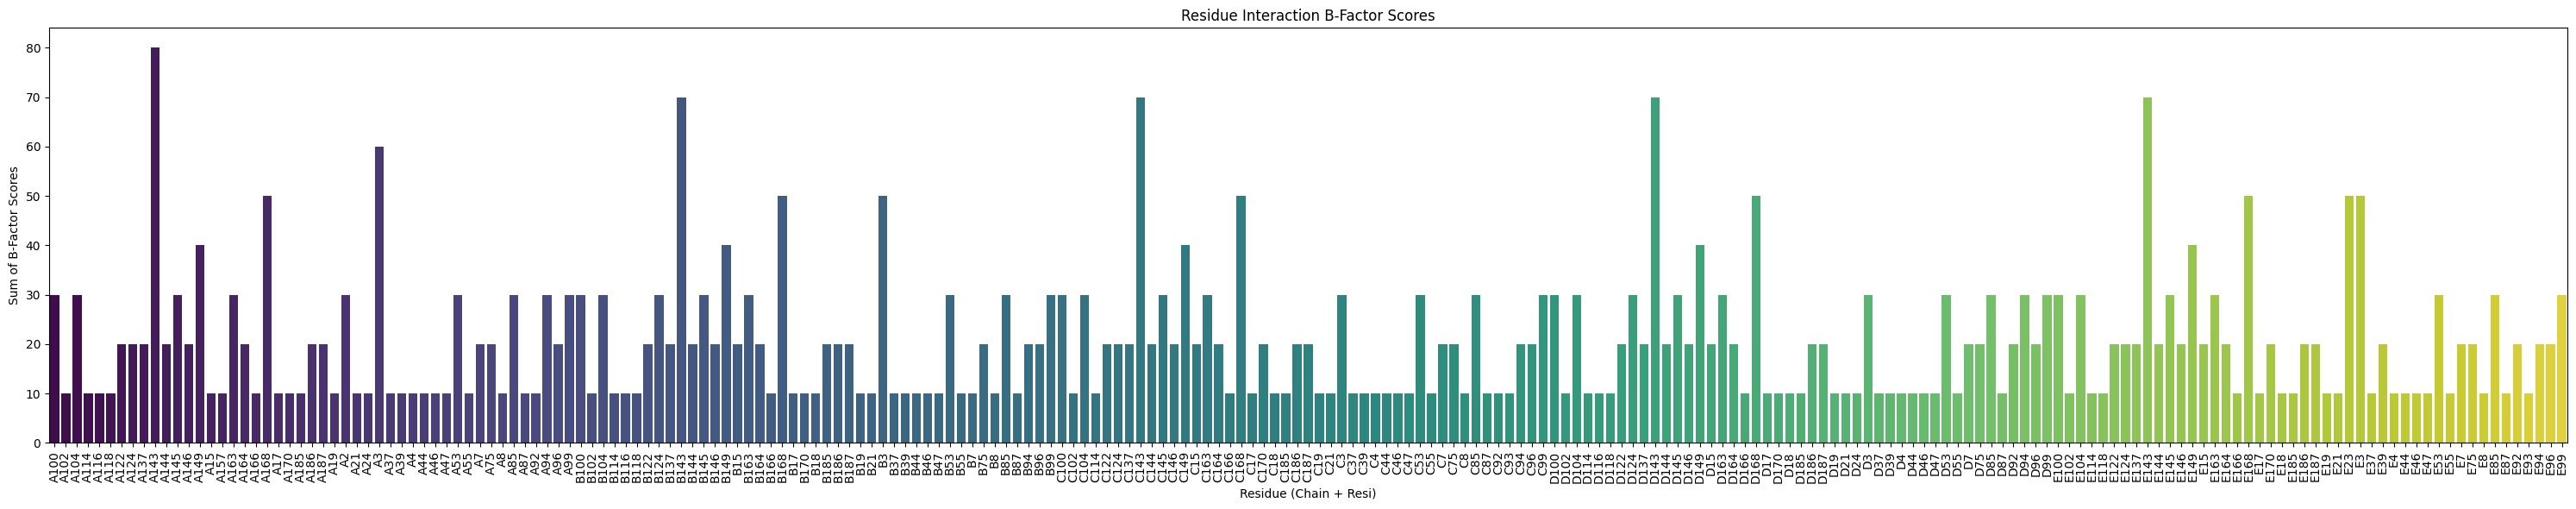

In [6]:
# plot x-chain_res, y-bf_sum, one chain per plot
# for each chain, rank based on chain_res(based on the number of res as interger), for example 1, 2,3, but still show chain_res in x-axis
# and only plot when bf_sum>0

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

chain_res = atom_array.chain_res
b_factor = atom_array.residue_b_factor
df = pd.DataFrame({
    "chain_res": chain_res,
    "residue_b_factor": b_factor
})
df = df[df['residue_b_factor'] > 0]
df['res_num'] = df['chain_res'].str[1:].astype(int)
df = df.sort_values(by=['chain_res', 'res_num'])
plt.figure(figsize=(30, 6))
sns.barplot(data=df, x='chain_res', y='residue_b_factor', palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Residue (Chain + Resi)')
plt.ylabel('Sum of B-Factor Scores')
plt.title('Residue Interaction B-Factor Scores')
plt.tight_layout()
plt.show()

- The calculation using previous method has complexity of X(N1*N2), which is ok for small system.
- When system is getting larger, using CellList is a better way.
- The idea of CellList is:
1. Cut the space into small cells
2. Each atom put into small cells.
3. When check neighbors, only check the current cell and neighbor cell, and ignore the box in a distance.
4. The complexity is closer to O(1)

In [7]:
from biotite.structure import CellList

cell = CellList(atom_array, cell_size=4.0)

interface_mask = np.zeros(len(atom_array), dtype=bool)

for i, coord in enumerate(atom_array.coord):
    neighbors = cell.get_atoms(coord, radius=4.0)
    print(f"atom {i} neighbors: {neighbors}")
    # remove itself
    neighbors = neighbors[neighbors != -1]

    # if any neighbor atom belongs to a different chain, mark as interface atom
    if np.any(atom_array.chain_id[neighbors] != atom_array.chain_id[i]):
        interface_mask[i] = True
        print(f"atom {i} is at the interface.")
        # Set b-factor for interface atoms
        b_factor[i] = 20
    else:
        print(f"atom {i} is not at the interface.")
        b_factor[i] = 0
atom_array.set_annotation("b_factor", b_factor)
pdb = PDBFile()
pdb.set_structure(atom_array)
pdb.write("interface_colored_celllist.pdb")


atom 0 neighbors: [  5   7   0   1   4 575   2   3   8]
atom 0 is not at the interface.
atom 1 neighbors: [  5   6   7   0   1   4 575   2   3   8   9]
atom 1 is not at the interface.
atom 2 neighbors: [ 5  0  1  4  2  3  8 10 11  9 12]
atom 2 is not at the interface.
atom 3 neighbors: [  0   1   4 571 574 575   2   3   8  10 563   9  12 582]
atom 3 is not at the interface.
atom 4 neighbors: [  5   6   7   0   1   4 574 575   2   3   8]
atom 4 is not at the interface.
atom 5 neighbors: [5 6 7 0 1 4 2]
atom 5 is not at the interface.
atom 6 neighbors: [  5   6   7   1   4 543]
atom 6 is not at the interface.
atom 7 neighbors: [ 5  6  7  0  1  4 36]
atom 7 is not at the interface.
atom 8 neighbors: [ 0  1  4 39  2  3  8 10 11 14  9 12 13 16]
atom 8 is not at the interface.
atom 9 neighbors: [ 1  2  3  8 10 11 14  9 12 13 15 16 17]
atom 9 is not at the interface.
atom 10 neighbors: [ 2  3  8 10 11 14 32  9 12 13 16 17 18 19 20 27]
atom 10 is not at the interface.
atom 11 neighbors: [36 45

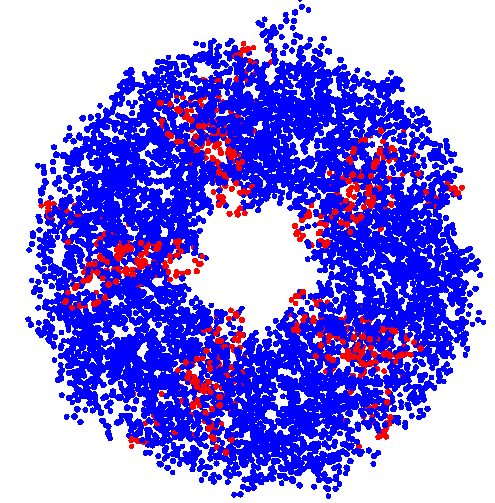

defaultdict(<class 'float'>, {'A1': np.float64(0.0), 'A2': np.float64(5.0), 'A3': np.float64(19.0), 'A4': np.float64(7.0), 'A5': np.float64(0.0), 'A6': np.float64(0.0), 'A7': np.float64(4.0), 'A8': np.float64(3.0), 'A9': np.float64(0.0), 'A10': np.float64(0.0), 'A11': np.float64(0.0), 'A12': np.float64(0.0), 'A13': np.float64(0.0), 'A14': np.float64(0.0), 'A15': np.float64(9.0), 'A16': np.float64(0.0), 'A17': np.float64(2.0), 'A18': np.float64(1.0), 'A19': np.float64(1.0), 'A20': np.float64(0.0), 'A21': np.float64(1.0), 'A22': np.float64(0.0), 'A23': np.float64(0.0), 'A24': np.float64(1.0), 'A25': np.float64(0.0), 'A26': np.float64(0.0), 'A27': np.float64(0.0), 'A28': np.float64(0.0), 'A29': np.float64(0.0), 'A30': np.float64(0.0), 'A31': np.float64(0.0), 'A32': np.float64(0.0), 'A33': np.float64(0.0), 'A34': np.float64(0.0), 'A35': np.float64(0.0), 'A36': np.float64(0.0), 'A37': np.float64(2.0), 'A38': np.float64(0.0), 'A39': np.float64(1.0), 'A40': np.float64(0.0), 'A41': np.float64(

/tmp/ipykernel_443748/2941315759.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='chain_res', y='residue_b_factor', palette='viridis')


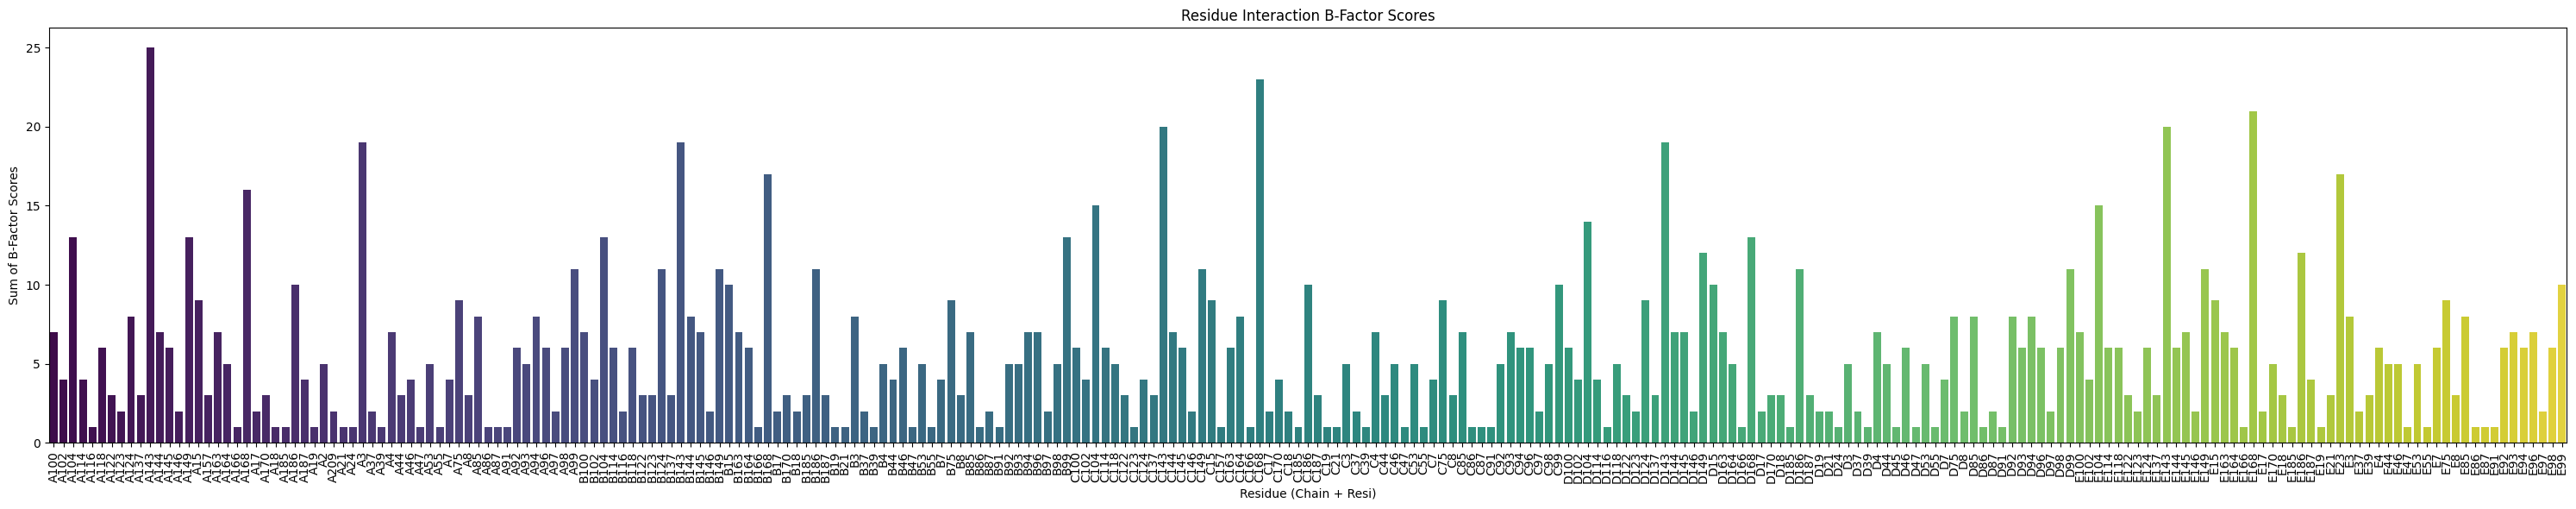

In [8]:
from biotite.structure import CellList
from collections import defaultdict

cell = CellList(atom_array, cell_size=4.0)

bf_sum = defaultdict(float)

for i, coord in enumerate(atom_array.coord):
    neighbors = cell.get_atoms(coord, radius=4.0)
    neighbors = neighbors[neighbors != -1]

    # only count contacts to different chains
    mask = atom_array.chain_id[neighbors] != atom_array.chain_id[i]
    n_contact = np.sum(mask)

    cr = f"{atom_array.chain_id[i]}{atom_array.res_id[i]}"
    bf_sum[cr] += n_contact
    
print(bf_sum)

# write the residue b_factor score back to structure
bf_sum_atom = np.array([bf_sum[cr] for cr in chain_res])
atom_array.set_annotation("residue_b_factor", bf_sum_atom)
atom_array.set_annotation("chain_res", chain_res)

chain_res = atom_array.chain_res
b_factor = atom_array.residue_b_factor
df = pd.DataFrame({
    "chain_res": chain_res,
    "residue_b_factor": b_factor
})
df = df[df['residue_b_factor'] > 0]
df['res_num'] = df['chain_res'].str[1:].astype(int)
df = df.sort_values(by=['chain_res', 'res_num'])
plt.figure(figsize=(30, 6))
sns.barplot(data=df, x='chain_res', y='residue_b_factor', palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Residue (Chain + Resi)')
plt.ylabel('Sum of B-Factor Scores')
plt.title('Residue Interaction B-Factor Scores')
plt.tight_layout()
plt.show()


In [9]:
from biotite.structure import CellList

cell = CellList(atom_array, cell_size=2.0)

atom_C_mask = (atom_array.chain_id == 'A') & (atom_array.res_id == 1) & (atom_array.atom_name == 'C')
atom_N_mask = (atom_array.chain_id == 'A') & (atom_array.res_id == 2) & (atom_array.atom_name == 'N')

diff = atom_array[atom_C_mask].coord - atom_array[atom_N_mask].coord
dist = np.linalg.norm(diff)
print(f'C and N distance is {dist}')

has_clash = False
for i, coord in enumerate(atom_array.coord):
    neighbors = cell.get_atoms(coord, radius=2.0)
    neighbors = neighbors[neighbors != -1]

    # exclude itself
    neighbors = neighbors[neighbors != i]
    
    # exclude atoms from the same residue
    mask = atom_array.res_id[neighbors] != atom_array.res_id[i]
    neighbors = neighbors[mask]
    
    # exclude when atom name is C or N
    mask = ~np.isin(atom_array.atom_name[neighbors], ["C", "N"])
    neighbors = neighbors[mask]

    if len(neighbors) > 0:
        has_clash = True
        print(f"Atom {i} has clashes with atoms {neighbors}")
    else:
        continue

C and N distance is 1.3256494998931885


In [ ]:
# You could also use this method to quickly calculate core, surface, boundary residues
from biotite.structure import CellList
from collections import defaultdict

cell = CellList(atom_array, cell_size=6.0)
neighbor_count = np.zeros(len(atom_array), dtype=int)

for i, coord in enumerate(atom_array.coord):
    neigh = cell.get_atoms(coord, radius=6.0)
    neigh = neigh[neigh != -1]
    neigh = neigh[neigh != i]
    neighbor_count[i] = len(neigh)

res_neighbor_sum = defaultdict(int)

for i, n in enumerate(neighbor_count):
    cr = f"{atom_array.chain_id[i]}{atom_array.res_id[i]}"
    res_neighbor_sum[cr] += n

res_class = {}

for cr, n in res_neighbor_sum.items():
    if n > 500:
        res_class[cr] = "core"
    elif n < 200:
        res_class[cr] = "surface"
    else:
        res_class[cr] = "boundary"
        
bf = np.zeros(len(atom_array))

for i in range(len(atom_array)):
    cr = f"{atom_array.chain_id[i]}{atom_array.res_id[i]}"
    if res_class[cr] == "core":
        bf[i] = 10
    elif res_class[cr] == "boundary":
        bf[i] = 30
    else:
        bf[i] = 50

atom_array.set_annotation("b_factor", bf)
pdb = PDBFile()
pdb.set_structure(atom_array)
pdb.write("interface_colored_celllist_core_surface.pdb")


[  4   6 575   5   7  36  37 562 563 564   1   2   3   8  12  39  11 570
 571 574   9  10]
[  4   6 575   5   7  36  37   0 562 563   2   3   8  12  13  14  39  11
  40  45  47 571 574 582   9  10  16]
[  4   6 575   5   7  33  36  37  32   0 562 563   1   3   8  12  13  14
  15  39  11  40  45  47 570 571 572 574 576 581 582   9  10  16  17]
[   4    6  575    5    7    0  562  563    1    2    8   12   13   14
   15   39   11   45   47  570  571  572  573  574  576  577  580  581
  582    9   10   16   17 6704]
[  6 543 575   5   7  36  37   0 562 563   1   2   3   8  12  14  39 532
 534  11  40  44  45  47 570 571 574 582   9  10]
[ 75   4   6 543 575   7  34  36  37   0   1   2   3   8  39 530 531 532
  11  40  41  45  47 574   9  10]
[540  75   4 541 542 543 544 575   5   7  36   0   1   2   3   8 527 528
 530 531 532 533 534 535 548  11  40  41  44  45  47 574]
[ 73  75   4   6 575   5  33  34  35  36  37  32  38   0   1   2   3   8
  14  39  11  40  41  44  45  47   9  10]
[   4